<html>
    <h1 style="color:navy"><b><center>Assignment 3</center></b></h1>

</html>

# Sonam Mehra

## Student Id: A00213174

### import libraries



In [ ]:
#Import Python Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model 
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder 

In [ ]:
#Import Python Libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

<html>
<h1 style="color: maroon">Question 1:</h1>
<i> Read the airquality.csv data set. This gives the ozone level, solar radiation, wind
speed, and temperature (in degrees Fahrenheit) over five months</i>
</html>

In [ ]:
#read dataset
air = pd.read_csv("airquality.csv")
air

<html>
    <i> <b>a:</b> How many missing values are present for each variable?</i>

</html>

In [ ]:
#to check which variable has missing values true stands for missing values, false for no missing value
air.isnull().any()

In [ ]:
print(air.isnull().sum())

<html>
    <i> <b>b:</b> Create a data frame of complete cases and find the mean temperature using listwise deletion </i>

</html>

In [ ]:
df_air=air.dropna(axis=0) #deletes rows with null values
df_air

In [ ]:
# mean temperature

print("The mean of the temperature with listwise deletion is",round(df_air['Temp'].mean(),2))

<html>
    <i> <b>c:</b> Find the mean temperature using pairwise deletion </i>

</html>

In [ ]:
df_air_pair=air.copy() #creates copy of the dataframe

In [ ]:
print("The mean of the temperature with listwise deletion is",round(df_air_pair.Temp.mean(),2)) #All operations in pandas like mean,sum etc intrinsically skip missing values.

<html>
    <i> <b>d:</b> Which rows contain missing temperature values? </i>

</html>

In [ ]:
null_data = air[air['Temp'].isnull()] #rows with missing temp values
null_data

<html>
    <i> <b>e:</b> Create a box plot for the air quality data. Interpret the plot to explain why there are differences in the mean temperature. </i>

</html>

<AxesSubplot:xlabel='Month', ylabel='Temp'>

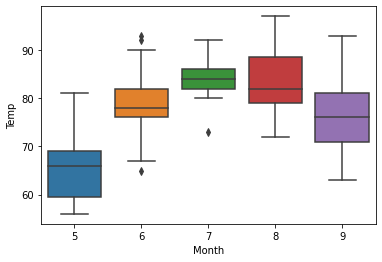

In [324]:
sns.boxplot(x='Month',y='Temp', data=air)

<html>
    <i> <b>f:</b> How many of the ozone values are outliers (using the default 1.5 IQR setting)? What are the ozone outlier values? Create a new data frame called ozone_complete that has all rows with ozone outliers removed.</i>

</html>

In [325]:
Q1=air.Ozone.quantile(0.25)
Q3=air.Ozone.quantile(0.75)
IQR=Q3-Q1
print(IQR)

45.25


In [326]:
df_final=air[~((air.Ozone<(Q1-1.5*IQR))|(air.Ozone>(Q3+1.5*IQR)))] #removes the outliers #which doesnt fall in this range is outlier


In [327]:
df_final

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67.0,5,1
1,36.0,118.0,8.0,72.0,5,2
2,12.0,149.0,12.6,74.0,5,3
3,18.0,313.0,11.5,62.0,5,4
4,NaN,NaN,14.3,56.0,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70.0,9,26
149,NaN,145.0,13.2,77.0,9,27
150,14.0,191.0,14.3,75.0,9,28
151,18.0,131.0,8.0,76.0,9,29


In [328]:
df_outlier_removed=pd.DataFrame(df_final) #creates the dataframe with removed outlier values
ind_diff=air.index.difference(df_outlier_removed.index) #index differnce between two data frames

In [329]:

print("The number of outlier values in Ozone Column is :",len(ind_diff))

The number of outlier values in Ozone Column is : 2


In [330]:
ind_diff #the values of outliers are 61,116

Int64Index([61, 116], dtype='int64')

<html>
<h1 style="color: maroon">Question 2:</h1>
<i> Using the original airqualty.csv</i>
</html>

In [331]:
#read dataset
air_q = pd.read_csv("airquality.csv")
air_q

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67.0,5,1
1,36.0,118.0,8.0,72.0,5,2
2,12.0,149.0,12.6,74.0,5,3
3,18.0,313.0,11.5,62.0,5,4
4,NaN,NaN,14.3,56.0,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70.0,9,26
149,NaN,145.0,13.2,77.0,9,27
150,14.0,191.0,14.3,75.0,9,28
151,18.0,131.0,8.0,76.0,9,29


<html>
    <i> <b>a:</b> Create a new data set called air_median from the air data set. Impute the missing solar radiation values with the MEDIAN of the non-missing radiations in the air_median dataset. </i>

</html>

In [332]:
air_median=air_q.copy()

In [333]:
air_median.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67.0,5,1
1,36.0,118.0,8.0,72.0,5,2
2,12.0,149.0,12.6,74.0,5,3
3,18.0,313.0,11.5,62.0,5,4
4,NaN,NaN,14.3,56.0,5,5


<html>
<h4>Calculate the median of the column </h4>
    </html>

In [334]:
med_solar = air_median["Solar.R"].astype("float").median(axis=0)
print("Median Solar Radiation:", med_solar)

Median Solar Radiation: 205.0


<html>
<h4>Replace "NaN" by median value in "Solar.R" column</h4>
 </html>

In [335]:
air_median["Solar.R"].replace(np.nan, med_solar, inplace=True)
#check if still any value not replaced
air_median["Solar.R"].isnull().value_counts()

False    153
Name: Solar.R, dtype: int64

<html>
<h4> b : Create a new data set called air_mean from the air_median data set. Impute the missing temperature values with the mean temperature for the month that the temperature is missing from in the air_mean data set. For example, impute missing month 5 temperature values with the mean of the non-missing temperatures for month 5.</h4>
    </html>

In [336]:
air_mean=air_median.copy()

In [337]:
mean_value =air_mean.groupby("Month")["Temp"].mean()

In [338]:
mean_value

Month
5    65.700000
6    78.965517
7    84.172414
8    83.967742
9    76.758621
Name: Temp, dtype: float64

In [339]:
for index, row in air_mean.iterrows():
    if pd.isnull(row['Temp']):
        month = air_mean.loc[index,'Month']
        air_mean.loc[index,'Temp'] = mean_value.loc[month]

In [340]:
air_mean['Temp'].isnull().value_counts()

False    153
Name: Temp, dtype: int64

<html>
<h4> c : Create a new data set called air_ratio from the air_mean data set. Impute the missing values of the Ozone variable using ratio imputation in the air_ratio data set
    </html>

In [341]:
air_ratio=air_mean.copy()

In [342]:
air_ratio['Ozone'].isnull().any()

True

In [343]:
air_ratio.corr() #check for highly correlated columns #ozone and Temp

,Ozone,Solar.R,Wind,Temp,Month,Day
Ozone,1.000000,0.343494,-0.601291,0.691783,0.164519,-0.013226
Solar.R,0.343494,1.000000,-0.017791,0.239893,-0.077812,-0.152965
Wind,-0.601291,-0.017791,1.000000,-0.469539,-0.184129,0.096955
Temp,0.691783,0.239893,-0.469539,1.000000,0.416809,-0.138610
Month,0.164519,-0.077812,-0.184129,0.416809,1.000000,-0.007962
Day,-0.013226,-0.152965,0.096955,-0.138610,-0.007962,1.000000


In [344]:
sum_temp=round(air_ratio['Temp'].sum(),2)
sum_ozone=round(air_ratio['Ozone'].sum(),2)
ratio=round(sum_ozone/sum_temp,2)

In [345]:
print("The ratio is ",ratio)

The ratio is  0.41


In [346]:
for index,row in air_ratio.iterrows():
    if(pd.isnull(row['Ozone'])):
        air_ratio.loc[index,'Ozone'] = ratio * air_ratio['Temp'][index]
        
air_ratio

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.00,190.0,7.4,67.0,5,1
1,36.00,118.0,8.0,72.0,5,2
2,12.00,149.0,12.6,74.0,5,3
3,18.00,313.0,11.5,62.0,5,4
4,22.96,205.0,14.3,56.0,5,5
...,...,...,...,...,...,...
148,30.00,193.0,6.9,70.0,9,26
149,31.57,145.0,13.2,77.0,9,27
150,14.00,191.0,14.3,75.0,9,28
151,18.00,131.0,8.0,76.0,9,29


In [347]:
air_ratio['Ozone'].isnull().value_counts()

False    153
Name: Ozone, dtype: int64

<html>
<h4> d : Create a new data set called air_complete from the air_ratio data set. Use linear regression to impute the missing values of Wind using Ozone as the independent variable in the air_complete data set.
    </html>

In [348]:
air_complete=air_ratio.copy()

In [349]:
complete=air_complete[['Wind','Ozone']]
complete.head()

,Wind,Ozone
0,7.4,41.00
1,8.0,36.00
2,12.6,12.00
3,11.5,18.00
4,14.3,22.96


In [350]:
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(complete)
imputed=imp.transform(complete)
air_complete['Wind']=imputed


In [351]:
air_complete.isnull().any() #to check the null values in the dataset

Ozone      False
Solar.R    False
Wind       False
Temp       False
Month      False
Day        False
dtype: bool

In [352]:
air_complete.isnull().value_counts()

Ozone  Solar.R  Wind   Temp   Month  Day  
False  False    False  False  False  False    153
dtype: int64